# <span style="color:#0b486b">  Deep Learning- CNN Techniques</span>



# <span style="color:#0b486b">  Sebastian Guerra</span>


## Convolutional Neural Networks and Image Classification



**For this part it is needed Tensorflow**

**The dataset we use for this part is a small animal dataset consisting of $2000$ images of cats, dogs, fishes and lions, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1t5b-pNMK5-uIK6wZIIHBluLY7tPK0JzV/view?usp=sharing) `**

**There's another file name moduls.py that is needed to run the program.**



1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also help generate next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement to build the CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [21]:
%load_ext autoreload
%autoreload 2

In [22]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [23]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [24]:
label_folder_dict= create_label_folder_dict(r"C:\Users\Sebastian\Documents\Semester 4 Monash\FIT5215 Deep Learning\FIT5215_Assignment1\FIT5215_Assignment1/datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process our experimental data. 

In [25]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

cats 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500


Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. 

In [26]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(1600, 32, 32, 3) (1600,)
(200, 32, 32, 3) (200,)
(200, 32, 32, 3) (200,)
['cats' 'dogs' 'fishes' 'lions']


We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [27]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [28]:
network1.build_cnn()
network1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_______________________________________

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [9]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 6s 4ms/sample - loss: 2.2257 - accuracy: 0.2887 - val_loss: 1.3793 - val_accuracy: 0.2950
Epoch 2/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3888 - accuracy: 0.2412 - val_loss: 1.3912 - val_accuracy: 0.2700
Epoch 3/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3878 - accuracy: 0.2475 - val_loss: 1.3934 - val_accuracy: 0.2250
Epoch 4/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3878 - accuracy: 0.2587 - val_loss: 1.3920 - val_accuracy: 0.2700
Epoch 5/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3887 - accuracy: 0.2219 - val_loss: 1.3900 - val_accuracy: 0.2700
Epoch 6/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.3882 - accuracy: 0.2556 - val_loss: 1.3844 - val_accuracy: 0.2700
Epoch 7/20
1600/1600 [==============================] - 6s 3ms/sample - loss:

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [10]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 763us/sample - loss: 1.3869 - accuracy: 0.2050


0.205

Below shows how you can inspect the training progress.

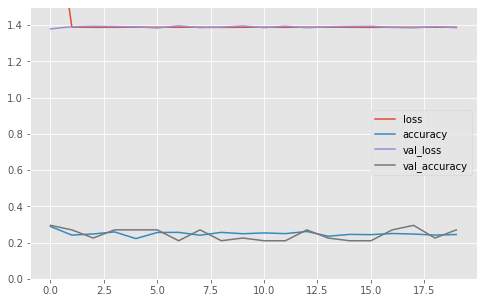

In [11]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [12]:
network1.predict(data_manager.X_test[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

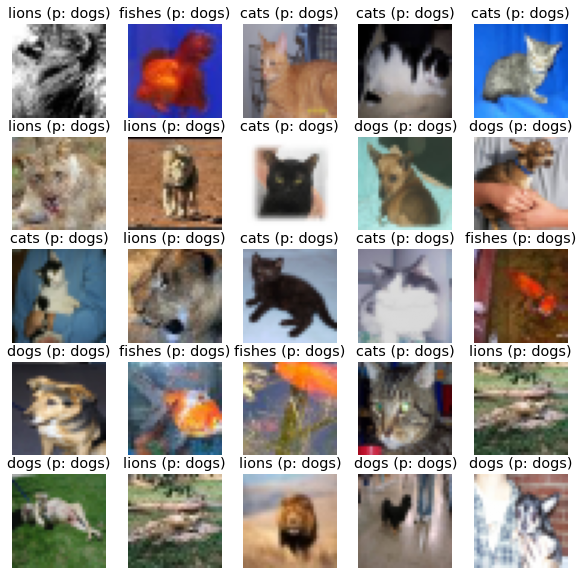

In [13]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

**What happened to the model above?**






Based on the learning curve I would say the model did not learned well. This is beacause it's expected for the accuracy & val_accuracy to increase over each iteration, but we can see that it remains constant at ~25%. Also, the loss and val_loss should decrease over time, which same as the accuracy it remains the same. This indicates that the model didn't learned correctly. This may be causde by the high learning parameter used which is 0.5, this may cause the model to have suboptimal values. The best approach would be try with different learning rates to figure out which one is optimal.



**Normally the first parameter to tune in Deep Learning is learning rate. We would be running different learning rates which are: $[0.0001, 0.001, 0.005, 0.01]$ by entering the value in the cell below and run it.**
   


In [14]:
learning_rate= [0.0001,0.001,0.005,0.01]
variable_names=["network2","network3","network4","network5"]
for i in range(4):
    
    variable_names[i] = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate= learning_rate[i])





In [15]:
for item in variable_names:
    item.build_cnn()
    item.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_3 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [16]:
for item in variable_names:
    item.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 1.3833 - accuracy: 0.2844 - val_loss: 1.3855 - val_accuracy: 0.2450
Epoch 2/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 1.3833 - accuracy: 0.2862 - val_loss: 1.3855 - val_accuracy: 0.2400
Epoch 3/20
1600/1600 [==============================] - 4s 2ms/sample - loss: 1.3833 - accuracy: 0.2862 - val_loss: 1.3855 - val_accuracy: 0.2400
Epoch 4/20
1600/1600 [==============================] - 4s 2ms/sample - loss: 1.3832 - accuracy: 0.2869 - val_loss: 1.3854 - val_accuracy: 0.2400
Epoch 5/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 1.3832 - accuracy: 0.2862 - val_loss: 1.3854 - val_accuracy: 0.2400
Epoch 6/20
1600/1600 [==============================] - 4s 3ms/sample - loss: 1.3831 - accuracy: 0.2862 - val_loss: 1.3854 - val_accuracy: 0.2400
Epoch 7/20
1600/1600 [==============================] - 4s 3ms/sample - loss:

In [17]:
for item in variable_names:
    item.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 638us/sample - loss: 0.9125 - accuracy: 0.5850


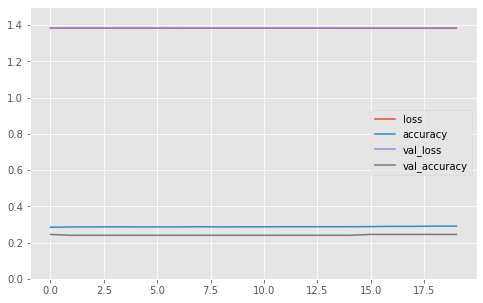

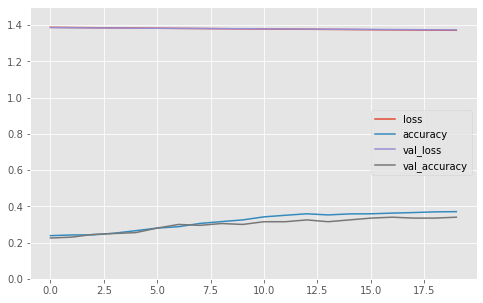

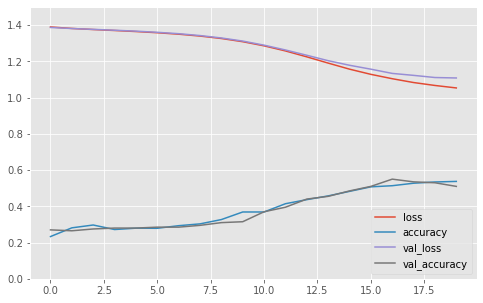

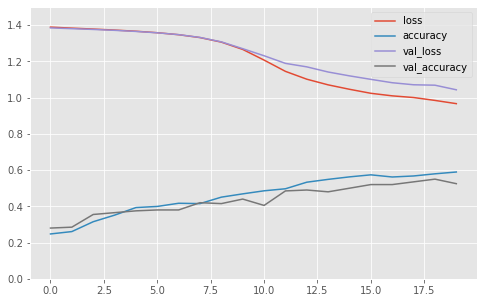

In [18]:
for item in variable_names:
    item.plot_progress()



From all of the training parameters it seems like 0.01 gives the most accuracy from all. The sweetspot will be around 0.01 as the models don't seem to perform as well with lower and higher learning parameters. 




**In the follow there will be different techniques to see how it affects the overall model, here they are:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [39]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose)
    #[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]. 
    #All convolutional layers have filter size  (3,3) , strides  (1,1)  and 'SAME' padding, and all mean pool layers have strides  (2,2)  and 'SAME' padding. 
    #The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.
    def build_cnn(self):
        self.model = models.Sequential()
        for i in range (self.num_blocks):
            self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
            self.model.add(layers.BatchNormalization(self.batch_norm))
            self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
            self.model.add(layers.BatchNormalization(self.batch_norm))
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            self.model.add(layers.Dropout(self.drop_rate)) 
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        
        

**Now to see how dropout affects the model, it will be used with numbers from 0.2-0.5.**
    





Yes, the dropout greatly improved our model. Without drop out in the last section we got an accuracy of around 55% being the best and tunning the dropout we got accuracy from 66%-70%, this is a great increase of 15%! The worst performance is when dropout was set to 0.4, this yielded 67%. The best performance was when dropout values were 0.2 or 0.3, both yielded 70.5% accuracy, although the loss was a bit lower with dropout=0.3. So the best value for our model will be 0.3.




In [51]:

drop_out_network = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0.5, # enter your final dropout rate value here
                     batch_norm=None,     
                     optimizer='adam',
                     learning_rate= 0.001)
drop_out_network.build_cnn()
drop_out_network.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d_22 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 8, 8, 32)        

In [52]:
drop_out_network.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 6s 4ms/sample - loss: 1.3850 - accuracy: 0.2519 - val_loss: 1.3571 - val_accuracy: 0.2250
Epoch 2/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.2645 - accuracy: 0.3431 - val_loss: 1.1830 - val_accuracy: 0.4700
Epoch 3/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.1581 - accuracy: 0.4269 - val_loss: 1.0678 - val_accuracy: 0.5000
Epoch 4/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.0786 - accuracy: 0.4600 - val_loss: 0.9912 - val_accuracy: 0.5250
Epoch 5/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 1.0265 - accuracy: 0.4856 - val_loss: 0.9406 - val_accuracy: 0.5550
Epoch 6/20
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.9839 - accuracy: 0.5562 - val_loss: 0.9168 - val_accuracy: 0.6100
Epoch 7/20
1600/1600 [==============================] - 5s 3ms/sample - loss:

In [44]:
#this is with droopout 0.2, it improved =)
drop_out_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 474us/sample - loss: 0.8055 - accuracy: 0.7050


0.705

In [47]:
#this is with droopout 0.3
drop_out_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 444us/sample - loss: 0.6763 - accuracy: 0.7050


0.705

In [50]:
#this is with droopout 0.4
drop_out_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 496us/sample - loss: 0.7076 - accuracy: 0.6700


0.67

In [53]:
#this is with droopout 0.5
drop_out_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 559us/sample - loss: 0.7157 - accuracy: 0.6950


0.695

**</span> **Now, let's try using batch normalization. What is the validation and test result? Does it improve the model? How does it compare to the model using dropout? To have a fair comparison, in this experiment, we set `drop_rate=0` to not use the dropout.**
 






When the drop rate was changed to 0 and batch norm to true, the accuracy of the model is 69%. However, when it was set to None, the model went even higher with 74%. It has been the best so far, but also the number of blocks was set to 4.

In [38]:
batch_norm_network = YourModel(name='network4',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)
batch_norm_network.build_cnn()
batch_norm_network.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)       

In [61]:
batch_norm_network.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 10s 6ms/sample - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.1844 - val_accuracy: 0.6700
Epoch 2/20
1600/1600 [==============================] - 9s 6ms/sample - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.1631 - val_accuracy: 0.6750
Epoch 3/20
1600/1600 [==============================] - 9s 6ms/sample - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.1728 - val_accuracy: 0.6800
Epoch 4/20
1600/1600 [==============================] - 8s 5ms/sample - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.1539 - val_accuracy: 0.6900
Epoch 5/20
1600/1600 [==============================] - 9s 5ms/sample - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.1476 - val_accuracy: 0.7100
Epoch 6/20
1600/1600 [==============================] - 8s 5ms/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.1678 - val_accuracy: 0.6900
Epoch 7/20
1600/1600 [==============================] - 9s 5ms/sample - loss

In [60]:
#set to true
batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 955us/sample - loss: 1.1220 - accuracy: 0.6900


0.69

In [62]:
#set to none
batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 995us/sample - loss: 1.0711 - accuracy: 0.7400


0.74

 **Finally, you should try to train the best model by trying different configurations for `num_blocks`, `feature_maps`, `optimizer`, `learning_rate`, `batch_size`, `keep_prob` and `batch_norm`. Briefly report the experiments that you try and your observation in the answer below. Also, run the cells below with the best configuration you found.**
   



After testing different parameters, the best model achieved 75% accuracy. This is the best model so far and it was set with this parameters: #batch = True, drop rate = 0.2, blocks =4, learning= 0.001. adam optimizer. The main issue we encounter is overfitting. The accuracy of the set is somewhat good 60-80% in some cases, but the validation accuracy is not as good. Tweaking a little bit the parameters we encountered the best model.

In [103]:
test_network = YourModel(name='network5',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=4,
                     drop_rate= 0, 
                     batch_norm=True, #do batch norm    
                     optimizer='adam',
                     learning_rate= 0.001)
test_network.build_cnn()
test_network.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_66 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_67 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
average_pooling2d_56 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 16, 16, 32)      

In [104]:
test_network.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 15s 10ms/sample - loss: 1.1218 - accuracy: 0.4919 - val_loss: 1.3739 - val_accuracy: 0.3450
Epoch 2/20
1600/1600 [==============================] - 9s 6ms/sample - loss: 0.9002 - accuracy: 0.5931 - val_loss: 1.3703 - val_accuracy: 0.3350
Epoch 3/20
1600/1600 [==============================] - 9s 6ms/sample - loss: 0.8015 - accuracy: 0.6637 - val_loss: 1.3823 - val_accuracy: 0.3650
Epoch 4/20
1600/1600 [==============================] - 10s 6ms/sample - loss: 0.6932 - accuracy: 0.7144 - val_loss: 1.3941 - val_accuracy: 0.2400
Epoch 5/20
1600/1600 [==============================] - 9s 6ms/sample - loss: 0.6340 - accuracy: 0.7456 - val_loss: 1.4651 - val_accuracy: 0.2750
Epoch 6/20
1600/1600 [==============================] - 9s 6ms/sample - loss: 0.5496 - accuracy: 0.7950 - val_loss: 1.5402 - val_accuracy: 0.2400
Epoch 7/20
1600/1600 [==============================] - 9s 6ms/sample - lo

In [68]:
#batch = true, drop rate = 0.3, blocks =4, learning= 0.001
test_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 1ms/sample - loss: 0.7622 - accuracy: 0.6900


0.69

In [83]:
#batch = True, drop rate = 0, blocks =2, learning= 0.001
test_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 707us/sample - loss: 1.3986 - accuracy: 0.5700


0.57

In [87]:
#batch = True, drop rate = 0.2, blocks =2, learning= 0.001
test_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 732us/sample - loss: 1.0023 - accuracy: 0.7200


0.72

In [90]:
#batch = True, drop rate = 0.2, blocks =2, learning= 0.01
test_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 758us/sample - loss: 0.7597 - accuracy: 0.6800


0.68

In [94]:
#batch = True, drop rate = 0.2, blocks =4, learning= 0.001
test_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 838us/sample - loss: 0.7154 - accuracy: 0.7500


0.75

In [102]:
#batch = True, drop rate = 0.2, blocks =4, learning= 0.001,adadelta
test_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 1ms/sample - loss: 1.3497 - accuracy: 0.3800


0.38

In [105]:
#batch = True, drop rate = 0.2, blocks =4, learning= 0.001,nadam
test_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 0s 2ms/sample - loss: 1.1378 - accuracy: 0.7050


0.705

 **We now try to apply data augmentation to improve the performance.By extending the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation.**
   


In [7]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [36]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
       
        
        if self.is_augmentation== "True":
            self.aug = ImageDataGenerator(rotation_range=5, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")
            self.model = models.Sequential()
            for i in range (self.num_blocks):
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
                self.model.add(layers.BatchNormalization(self.batch_norm))
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(self.batch_norm))
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
                self.model.add(layers.Dropout(self.drop_rate)) 
            self.model.add(layers.Flatten())
            self.model.add(layers.Dense(self.num_classes, activation='softmax'))
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
            def fit(self, data_manager, batch_size=None, num_epochs=None):
                batch_size = self.batch_size if batch_size is None else batch_size
                num_epochs = self.num_epochs if num_epochs is None else num_epochs
                self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                aug = ImageDataGenerator(rotation_range=5, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")
                self.history = self.model.fit_generator(aug.flow(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid), epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)) 
                
        else:
            self.model = models.Sequential()
            for i in range (self.num_blocks):
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
                self.model.add(layers.BatchNormalization(self.batch_norm))
                self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
                self.model.add(layers.BatchNormalization(self.batch_norm))
                self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
                self.model.add(layers.Dropout(self.drop_rate)) 
            self.model.add(layers.Flatten())
            self.model.add(layers.Dense(self.num_classes, activation='softmax'))
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])    
            
            def fit(self, data_manager, batch_size=None, num_epochs=None):
                batch_size = self.batch_size if batch_size is None else batch_size
                num_epochs = self.num_epochs if num_epochs is None else num_epochs
                self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                aug = ImageDataGenerator(rotation_range=5, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")
                self.history = self.model.fit_generator(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid), epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)
        
    
       

In [35]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        self.model = models.Sequential()
        for i in range (self.num_blocks):
            self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
            self.model.add(layers.BatchNormalization(self.batch_norm))
            self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
            self.model.add(layers.BatchNormalization(self.batch_norm))
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            self.model.add(layers.Dropout(self.drop_rate)) 
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        aug = ImageDataGenerator(rotation_range=5, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        aug = ImageDataGenerator(rotation_range=5, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")
        self.history = self.model.fit(aug.flow(x = data_manager.X_train, y = data_manager.y_train, batch_size = batch_size), validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, verbose= self.verbose)

In [101]:
aug_network= YourModel(name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=4,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = True,
                 is_augmentation = True,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001)
aug_network.build_cnn()
aug_network.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_104 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_105 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
average_pooling2d_51 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 16, 16, 32)      

In [106]:
aug_network.fit(data_manager, batch_size = 10, num_epochs = 20)

Train for 160 steps, validate on 200 samples
Epoch 1/20
160/160 [==============================] - 12s 74ms/step - loss: 0.6471 - accuracy: 0.7275 - val_loss: 0.6062 - val_accuracy: 0.7650
Epoch 2/20
160/160 [==============================] - 11s 69ms/step - loss: 0.6053 - accuracy: 0.7400 - val_loss: 0.6901 - val_accuracy: 0.7200
Epoch 3/20
160/160 [==============================] - 12s 74ms/step - loss: 0.6001 - accuracy: 0.7450 - val_loss: 0.6372 - val_accuracy: 0.7600
Epoch 4/20
160/160 [==============================] - 12s 74ms/step - loss: 0.6120 - accuracy: 0.7331 - val_loss: 0.6298 - val_accuracy: 0.7550
Epoch 5/20
160/160 [==============================] - 12s 75ms/step - loss: 0.6176 - accuracy: 0.7381 - val_loss: 0.6648 - val_accuracy: 0.7600
Epoch 6/20
160/160 [==============================] - 12s 73ms/step - loss: 0.5875 - accuracy: 0.7356 - val_loss: 0.6777 - val_accuracy: 0.7550
Epoch 7/20
160/160 [==============================] - 12s 74ms/step - loss: 0.6019 - accura

In [107]:
aug_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

200/200 [==============================] - 1s 3ms/sample - loss: 0.8639 - accuracy: 0.7600


0.76

## Conclusion
   




The highest accuracy obtained has been with Data Augmentation, although the increase is not that high (1%), it's still an increase. This method helps boost up datasets that does not contain many entries and can be usefull to boost accuracies of 90%+. In conclusion, performing different operations such as dropout, batch_norm and data augmentation helped boost the accuracy up to 76%.

From an initial 20% we managed to get the accuracy to 76%! This is a huge increase and is to show how different techniques in CNN have a positive impact on the overall accuracy of the model.